In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to investigate the content of a Parquet file
def investigate_parquet(file_path):
    df = pd.read_parquet(file_path)
    
    print("Basic Information:")
    print(df.info())

    print(df.columns)
    
    # print("\nFirst Few Rows:")
    # print(df.head())
    
    # print("\nSummary Statistics:")
    # print(df.describe())
    return df

In [3]:
# Function to plot the distribution of specified columns from a Parquet file
def plot_distributions(file_path, columns, bins, range_dict):
    # Read the Parquet file into a DataFrame
    df = pd.read_parquet(file_path)
    
    # Plot the distributions
    plt.figure(figsize=(12, 8))
    
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        # if bins and range_dict not difined take default ones
        if column not in bins: 
            bins[column] = 30
            range_dict[column] = (0, 100)
        plt.hist(df[column], bins=bins[column], range=range_dict[column])
        plt.title(f'Distribution of {column}')
    
    plt.tight_layout()
    plt.show()

In [4]:
file_path = "/depot/cms/private/users/shar1172/copperheadV2/test.parquet"
file_path = "/depot/cms/private/users/shar1172/copperheadV2/scripts/muon_info.parquet"
file_path = "/depot/cms/private/users/shar1172/copperheadV2/scripts/test.parquet"
investigate_parquet(file_path)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Muon_eta  5 non-null      int64
dtypes: int64(1)
memory usage: 172.0 bytes
None
Index(['Muon_eta'], dtype='object')


,Muon_eta
0,2
1,1
2,2
3,1
4,1


In [5]:
# file_path = '/depot/cms/users/yun79/hmm/copperheadV1clean/DYMiNNLO_30Mar2025/stage1_output/2017/f1_0//data_*/*/*.parquet'
file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/April19_NanoV12_TightPUID/stage1_output/2018/f1_0/data_A/0/part0691.parquet'
file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/April19_NanoV12_TightPUID/stage1_output/2018/f1_0/dy_M-50_MiNNLO/0/part1990.parquet'
file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/April19_NanoV12_TightPUID/stage1_output/2018/f1_0/dy_M-100To200_MiNNLO/0/part000.parquet'
# file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/April19_NanoV12_TightPUID/stage1_output/2018/f1_0/st_t_antitop/0/part0000.parquet'
# file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/April19_NanoV12_TightPUID/stage1_output/2018/f1_0/ttjets_dl/0/part0000.parquet'
# file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/April19_NanoV12_TightPUID/stage1_output/2018/f1_0/ttjets_sl/0/part0000.parquet'
# test = investigate_parquet(file_path)

import dask_awkward as dak
import awkward as ak
df = dak.from_parquet(file_path)
print(f"     Entries: {ak.num(df,axis=0).compute()}")

     Entries: 226


In [6]:
# Example usage
# file_path = '/depot/cms/users/shar1172/hmm/copperhead_outputs_10Feb/stage1_output/2018/f0_1/data_A/0/part00.parquet'
# file_path = '/depot/cms/users/shar1172/hmm/copperhead_outputs_10Feb/stage1_output/2018/f0_1/dy_M-50/0/part00.parquet'

# file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/Run3_nanoAODv12_BSOff/stage1_output/2022preEE/f1_0/ggh_powhegPS/0/part.0.parquet'
# file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/Run3_nanoAODv12_BSOff/stage1_output/2022preEE/f1_0/data_C/0/part.337.parquet'
# file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/DYWithoutLHECut_16Feb_AllYear_UpdatedZptWgt/stage1_output/2018/f1_0//dy_M-50/0/part.382.parquet'
# file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/March25_NanoAODv9_/stage1_output/2018/f1_0/dy_M-50_MiNNLO/0/part295.parquet'
# df_M50 = investigate_parquet(file_path)
# 
# file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/March25_NanoAODv9_/stage1_output/2018/f1_0/dy_M-100To200_MiNNLO/0/part15.parquet'
df_M100 = investigate_parquet(file_path)
print(list(df_M100.columns))

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Columns: 151 entries, event to fraction
dtypes: bool(3), float32(40), float64(96), int32(2), int64(7), uint64(1), uint8(2)
memory usage: 221.9 KB
None
Index(['event', 'PV_npvs', 'PV_npvsGood', 'MET_pt', 'MET_phi', 'MET_sumEt',
       'mu1_pt', 'mu1_ptErr', 'mu2_pt', 'mu2_ptErr',
       ...
       'separate_wgt_muID', 'separate_wgt_muIso', 'separate_wgt_muTrig',
       'separate_wgt_LHERen', 'separate_wgt_LHEFac', 'separate_wgt_pdf_2rms',
       'separate_wgt_jetpuid_wgt', 'separate_wgt_qgl_wgt',
       'separate_wgt_zpt_wgt', 'fraction'],
      dtype='object', length=151)
['event', 'PV_npvs', 'PV_npvsGood', 'MET_pt', 'MET_phi', 'MET_sumEt', 'mu1_pt', 'mu1_ptErr', 'mu2_pt', 'mu2_ptErr', 'mu1_pt_over_mass', 'mu2_pt_over_mass', 'mu1_eta', 'mu2_eta', 'mu1_phi', 'mu2_phi', 'mu1_charge', 'mu2_charge', 'mu1_iso', 'mu2_iso', 'nmuons', 'dimuon_mass', 'dimuon_pt', 'dimuon_pt_log', 'dimuon_eta', 'dimuon_rap

In [7]:
# print entries insise "separate_wgt_xsec"
# print(df_M50["separate_wgt_zpt_wgt"],df_M100["separate_wgt_pu_wgt"])
# print(df_M100["separate_wgt_pu_wgt"])
print(df_M100["jet2_pt_nominal"])

0            NaN
1      25.826863
2            NaN
3            NaN
4      31.899052
         ...    
221          NaN
222    27.044189
223    36.662978
224          NaN
225          NaN
Name: jet2_pt_nominal, Length: 226, dtype: float64


In [ ]:
columns = [col for col in df.columns if 'separate' in col]
for val in columns:
    print(val)

In [ ]:
# Example usage
# file_path = '/depot/cms/users/shar1172/hmm/copperhead_outputs_10Feb/stage1_output/2018/f0_1/data_A/0/part00.parquet'
# file_path = '/depot/cms/users/shar1172/hmm/copperhead_outputs_10Feb/stage1_output/2018/f0_1/dy_M-50/0/part00.parquet'

file_path = '/depot/cms/users/shar1172/hmm/copperheadV1clean/Run3_nanoAODv12_BSOn/stage1_output/2022preEE/f1_0/ggh_powhegPS/0/part.0.parquet'
df = investigate_parquet(file_path)
print(list(df.columns))

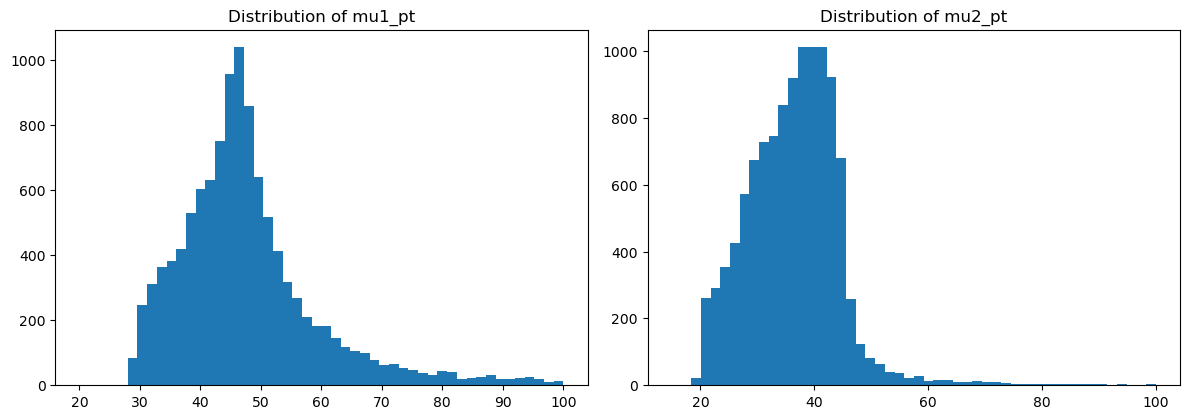

In [12]:
# Make distribution
columns = ['mu1_pt', 'mu2_pt']
# columns = ['mu1_pt', 'mu2_pt', 'mu1_pt_over_mass', 'mu2_pt_over_mass']
# columns = ['mmj1_dEta_nominal']
# columns = ['mu1_ptErr', 'mu2_ptErr']
bins = {
    'mu1_pt': 50,
    'mu2_pt': 50,
    'mu1_pt_over_mass': 30,
    'mu2_pt_over_mass': 30,
    'wgt_separate_zpt_wgt':30,
    'wgt_nominal':30,
    'mu1_ptErr':50,
    'mu2_ptErr':50
}
range_dict = {
    'mu1_pt': (20, 100),
    'mu2_pt': (15, 100),
    'mu1_pt_over_mass': (0, 1),
    'mu2_pt_over_mass': (0, 1),
    'wgt_separate_zpt_wgt':(0,1),
    'wgt_nominal':(0,100),
    'mu1_ptErr':(-1.0,15.0),
    'mu2_ptErr':(-1.0,15.0),
}
plot_distributions(file_path, columns, bins, range_dict)

In [ ]:
!pwd

# Get Number of entries

In [2]:
# Ram
sample_path = "/depot/cms/users/shar1172/hmm/copperheadV1clean/March25_NanoAODv9_/stage1_output/2018/f1_0/"
Sampellist = ["dy_M-100To200", "dy_M-100To200_MiNNLO", "dy_M-50", "dy_M-50_MiNNLO"]

In [5]:
# Hyeon
sample_path = "/depot/cms/users/yun79/hmm/copperheadV1clean/DYMiNNLO_jetpuidOff_newZptWgt25Mar2025/stage1_output/2018/f1_0/"
Sampellist = ["dy_M-100To200_MiNNLO", "dy_M-50_MiNNLO", "dy_M-50_MiNNLO_V2"]

In [4]:
import dask_awkward as dak
import awkward as ak
for sample in Sampellist:
    df = dak.from_parquet(f"{sample_path}/{sample}/*/*.parquet")
    print(f"===> Sample name: {sample}")
    print(f"     path: {sample_path}/{sample}/*/*.parquet")        
    print(f"     Entries: {ak.num(df,axis=0).compute()}")

===> Sample name: dy_M-100To200
     path: /depot/cms/users/shar1172/hmm/copperheadV1clean/March25_NanoAODv9_/stage1_output/2018/f1_0//dy_M-100To200/*/*.parquet
     Entries: 30307695
===> Sample name: dy_M-100To200_MiNNLO
     path: /depot/cms/users/shar1172/hmm/copperheadV1clean/March25_NanoAODv9_/stage1_output/2018/f1_0//dy_M-100To200_MiNNLO/*/*.parquet
     Entries: 1968035
===> Sample name: dy_M-50
     path: /depot/cms/users/shar1172/hmm/copperheadV1clean/March25_NanoAODv9_/stage1_output/2018/f1_0//dy_M-50/*/*.parquet
     Entries: 22497742
===> Sample name: dy_M-50_MiNNLO
     path: /depot/cms/users/shar1172/hmm/copperheadV1clean/March25_NanoAODv9_/stage1_output/2018/f1_0//dy_M-50_MiNNLO/*/*.parquet
     Entries: 79837361


In [6]:
import dask_awkward as dak
import awkward as ak
for sample in Sampellist:
    df = dak.from_parquet(f"{sample_path}/{sample}/*/*.parquet")
    print(f"===> Sample name: {sample}")
    print(f"     path: {sample_path}/{sample}/*/*.parquet")        
    print(f"     Entries: {ak.num(df,axis=0).compute()}")

===> Sample name: dy_M-100To200_MiNNLO
     path: /depot/cms/users/yun79/hmm/copperheadV1clean/DYMiNNLO_jetpuidOff_newZptWgt25Mar2025/stage1_output/2018/f1_0//dy_M-100To200_MiNNLO/*/*.parquet
     Entries: 1965239
===> Sample name: dy_M-50_MiNNLO
     path: /depot/cms/users/yun79/hmm/copperheadV1clean/DYMiNNLO_jetpuidOff_newZptWgt25Mar2025/stage1_output/2018/f1_0//dy_M-50_MiNNLO/*/*.parquet
     Entries: 79613443
===> Sample name: dy_M-50_MiNNLO_V2
     path: /depot/cms/users/yun79/hmm/copperheadV1clean/DYMiNNLO_jetpuidOff_newZptWgt25Mar2025/stage1_output/2018/f1_0//dy_M-50_MiNNLO_V2/*/*.parquet
     Entries: 31092688
